<a href="https://colab.research.google.com/github/MargoRita99/Machine-Learning/blob/main/%D0%9B%D0%A0_4_%D0%9C%D0%B0%D0%BA%D0%B0%D1%80%D0%BE%D0%B2%D0%B0_%D0%91%D0%98%D0%92%D0%A2_22_%D0%A1%D0%9F_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Метрики эффективности моделей машинного обучения
**Цель работы**  
Научиться измерять эффективность моделей машинного обучения с помощью метрик, вибирать метрики исходя из задачи, разбивать датасет на обучающую и тестовую подвыборки.  

**Содержание работы**  
- Загрузите данные о вероятности развития сердечного приступа, прилагающийся к этой работе (heart.csv)  
- Обучите на этих данных простую модель логистической регрессии и выведите метрику точности (accuracy)  
- Разделите датасет на две части - первую половину используйте для обучения, а вторую - для оценки точности. Сравните значения метрик.  
- Разделите датасет на две части случайным образом. Повторите анализ.  
- Разделите датасет с помощью библиотечной функции. Повторите анализ несколько раз.  
- Постройте матрицу классификации и отчет о классификации для обученной модели для обучающей и тестовой выборок. Проинтерпретируйте полученные значения.  
- Подсчитайте для построенной модели значение всех метрик эффективности классификации на тестовой и обучающей выборках. Нужно использовать следующие метрики: accuracy, precision, recall, f1.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML4.1%20metrics/data/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Видим содержание датасета о вероятности развития сердечного приступа. Целевая переменная - output, выделим ее

In [ ]:
y = data["output"]
x = data.drop("output", axis=1)

Применим самую простую модель - модель логистической регрессии

In [ ]:
from sklearn.linear_model import LogisticRegression

Обучим и выведем score

In [ ]:
logistic = LogisticRegression().fit(x, y)
logistic.score(x, y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8547854785478548

Видим, что точность модели равна 85%. Но эта оценка качества модели является завышенной (оптимистичной), так как она оценена именно по тем данным, на которых модель училась. Чтобы оценить именно обобщающую способность модели, то есть ее способность правильно предсказывать значение целевой переменной для тех объектов, которые она не учитывала при подстройке параметров, необходимо оценить модель на другой выборке. Для этого нужно разделить исходный датасет на две части. Обучающая выборка (первая часть) будет использоваться для нахождения оптимальных значений внутренних параметров модели, а тестовая выборка (вторая часть) - для оценки качества полученной модели.

Для начала поймем сколько у нас данных

In [ ]:
data.shape

(303, 14)

Всего 303 строки и 14 колонок с целевой перменной

Делить датасет можно разными способами. Важно, чтобы каждый конкретный объект попал только в одну выборку - либо тестовую, либо обучающую. То есть эти части должны быть непересекающиеся. Самый простой способ - просто взять какое-то количество объектов в начале датафрейма в обучающую выборку, а остальные - в тестовую. То есть мы просто берем несколько первых строчек (например, 200) для обучающей выборки

In [ ]:
x_train, y_train = x[:200], y[:200]
x_train.shape, y_train.shape

((200, 13), (200,))

Итак, первые 200 строк попали в обучающую выборку. Тогда тестовую выборку составять оставшиеся строки датасета:

In [ ]:
x_test, y_test = x[200:], y[200:]
x_test.shape, y_test.shape

((103, 13), (103,))

Теперь можно заново обучить модель классификации и оценить ее качество. Обратите внимание, что мы вызываем метод fit() именно на обучающей части датасета. А вот эффективность измеряем сначала на обучающей части, а затем на тестовой, чтобы сравнить

In [ ]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.9, 0.5436893203883495)

Получилось, что на обучающей выборки точность модели даже немного повысилась, до 90%. Это произошло за счет того, что в обучающей выборке меньше данных, чем в целом датасете. А чем меньше точек, тем проще модели под них подстроиться. А вот эффективность модели на тестовых данных стала сильно ниже - всего 54%. Это значит, что наша модель чуть лучше, чем простое угадывание.

Вместо того, чтобы вручную задавать количество объектов, которые отводятся на обучающую выборку, можно выразить это количество через процент от всего объема датасета. Это даст нам универсальность:

In [ ]:
N = int(x.shape[0] * 0.8)

x_train, y_train, x_test, y_test = x[:N], y[:N], x[N:], y[N:]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

В данном примере мы взяли 80% объектов для обучающей выборки и 20% - оставили на тестовую

Еще раз обучим и оценим модель, уже на новом разделении

In [ ]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8884297520661157, 0.6229508196721312)

Мы видим, что точность на обучающей выборке (мы ее будем называть обучающей точностью) чуть опустилась - опять же это эффект количества точек - сейчас их чуть больше. Но и тестовая эффективность (точность модели, измеренная на тестовой выборке) тоже подросла - до 62%. Это потому, что чем больше примеров мы использовали для обучения, тем более качественной и обобщающей получается наша модель.

Эти шаги не совсем правильные, но помогли нам понять, как работает разделение данных. Такая большая разница между метриками train и test является признаком переобучения. Выведем последние 5 строк тестового датасета

In [ ]:
data.tail()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Можно заметить, что вы первой половине данных целевая переменная (output) всегда положительная, а во второй - отрицательная. Другими словами, датасет отсортирован по значению целевой переменной. Поэтому наше разбиение имеет один неприятный эффект - в обучающей выборке скапливается большое количество положительных примеров, а в тестовой - только отрицательные. А для того, чтобы наше оценивание сработало, нужно, чтобы они были как можно более однородными.

Сразу куском брать данные нельзя. Даже если датасет не отсортирован по значению целевой переменной, он вполне может быть упорядочен по какому-то другому признаку, или хотя бы по времени добавления объектов в набор или базу данных.

Для решения этой проблемы воспользуемся индексными масками. Заведем массив булевских значений, в которых количество истинных значений будет соответствовать желаемому объему обучающей выборки, а ложных - объему тестовой. То есть 242 значения True и 61 - False

In [ ]:
mask = np.array([True] * N + [False] * (y.shape[0] - N))
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

В сумме должно получиться в точности количество объектов в полном датасете.Теперь перемешаем этот массив, используя стандартную функцию numpy

In [ ]:
from numpy.random import shuffle

shuffle(mask)
mask

array([False,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False, False,  True, False,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True, False, False,  True, False,  True,
        True,  True,  True,  True, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,

Этот булев массив можно использовать как маску при индексировании исходного датасета. Если выбрать данные по этой маске, то в итог попадут только те элементы, которые стоят на тех местах, на которых в маске - истина

In [ ]:
x_train = x[mask]
x_train.shape

(242, 13)

Смысл этого приема в том, что мы можем применить одну и ту же маску к обоим частям массива. А если инвертировать эту маску, то выберем оставшиеся значения

In [ ]:
x_train, y_train, x_test, y_test = x[mask], y[mask], x[~mask], y[~mask]
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

После такого разделения опять обучим и оценим модель

In [ ]:
logistic_test = LogisticRegression().fit(x_train, y_train)
logistic_test.score(x_train, y_train), logistic_test.score(x_test, y_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.8471074380165289, 0.8852459016393442)

Мы видим, что теперь разница между тестовой и обучающей выборкой стала гораздо меньше - 84,7% и 88,5% соответственно. Это как раз обосновано более правильным разделением, которое дает однородные по своему составу части датасета.

Такая стандартная процедура как случайное разделение датасета на две части уже реализована в виде готовой функции - в реальной работе не придется каждый раз дублировать приведенный код. Такая функция лежит в пакете sklearn, который отвечает за методологию выбора модели

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

**Построение метрик качества классификации**

В пакете metrics собрано множество функций, которые позволяют исследовать поведение уже обученных моделей, в том числе - метрики эффективности.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

Для использования большинства метрик необходимо передавать в эти функции два вектора - вектор истинных значений целевой переменной и вектор предсказанных значений. Истинные (эмпирические) значения - это часть исходного датасета. А предсказанные (теоретические) значения можно вычислить. Рассчитаем предсказанные значения отдельно для обучающей и для тестовой выборки

In [ ]:
y_test_pred = logistic_test.predict(x_test)
y_train_pred = logistic_test.predict(x_train)

 Построим матрицу классификации по train и test

In [ ]:
 confusion_matrix(y_train, y_train_pred)

array([[ 81,  24],
       [ 12, 125]])

In [ ]:
confusion_matrix(y_test, y_test_pred)

array([[25,  8],
       [ 0, 28]])

И в одной и во второй матрицах на главной диагонали больше значений, но в таком виде точный анализ не провести

In [ ]:
precision_score(y_train, y_train_pred)

0.8389261744966443

In [ ]:
precision_score(y_test, y_test_pred)

0.7777777777777778

Вот тут уже уже лучше видна разница. У train метрика лучше, чем у test

Выведем отчет о классификации

In [ ]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.77      0.82       105
           1       0.84      0.91      0.87       137

    accuracy                           0.85       242
   macro avg       0.85      0.84      0.85       242
weighted avg       0.85      0.85      0.85       242



In [ ]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86        33
           1       0.78      1.00      0.88        28

    accuracy                           0.87        61
   macro avg       0.89      0.88      0.87        61
weighted avg       0.90      0.87      0.87        61



Выведем остальные метрики и сведем вместе все в таблицу

In [ ]:
metrics = pd.DataFrame({
    "Train": [
        accuracy_score(y_train, y_train_pred),
        precision_score(y_train, y_train_pred),
        recall_score(y_train, y_train_pred),
        f1_score(y_train, y_train_pred),
    ],
    "Test": [
        accuracy_score(y_test, y_test_pred),
        precision_score(y_test, y_test_pred),
        recall_score(y_test, y_test_pred),
        f1_score(y_test, y_test_pred),
    ],
}, index = ["Accuracy", "Precision", "Recall", "F1"])

metrics

,Train,Test
Accuracy,0.851240,0.868852
Precision,0.838926,0.777778
Recall,0.912409,1.000000
F1,0.874126,0.875000


from matplotlib import pyplot as plt
metrics['Train'].plot(kind='hist', bins=20, title='Train')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics['Test'].plot(kind='hist', bins=20, title='Test')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics.plot(kind='scatter', x='Train', y='Test', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
metrics['Train'].plot(kind='line', figsize=(8, 4), title='Train')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
metrics['Test'].plot(kind='line', figsize=(8, 4), title='Test')
plt.gca().spines[['top', 'right']].set_visible(False)

Здесь мы видим сравнение четырех разных основных метрик качества модели классификации по обучающей и по тестовой выборкам. Видно, что тестовые метрики все чуть выше, чем обучающие.
При оценке эффективности модели машинного обучения ориентироваться нужно только на тестовые метрики. Но сравнение уровня тестовой и обучающей метрики - это один их основных инструментов диагностики модели машинного обучения.

**Задания для самостоятельного выполнения**

**1) Повторим анализ для других видов моделей**

Возьмем следующие 5 популярных моделей классификации:  
1) GaussianNB    
2) K-Nearest Neighbors (KNN)  
3) Decision Tree  
4) Random Forest  
5) Support Vector Machine (SVM)  

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Для оценки обобщающей способности модели, то есть ее способности правильно предсказывать значение целевой переменной для тех объектов, которые она не учитывала при подстройке параметров, необходимо разделить исходный датасет на две части. Обучающая выборка (первая часть) будет использоваться для нахождения оптимальных значений внутренних параметров модели, а тестовая выборка (вторая часть) - для оценки качества полученной модели

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((242, 13), (242,), (61, 13), (61,))

Обучим модели и сразу же рассчитаем метрики только на тестовой выборке

In [ ]:
models = {
    "Gaussian Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }
metrics_df = pd.DataFrame(results).T
print(metrics_df)

                        Accuracy  Precision   Recall  F1 Score
Gaussian Naive Bayes    0.868852   0.900000  0.84375  0.870968
K-Nearest Neighbors     0.688525   0.685714  0.75000  0.716418
Decision Tree           0.786885   0.880000  0.68750  0.771930
Random Forest           0.852459   0.848485  0.87500  0.861538
Support Vector Machine  0.704918   0.666667  0.87500  0.756757


**Accuracy** - общая точность: доля правильных предсказаний среди всех  
**Precision**	- точность: из всех, кого модель предсказала как «положительных», сколько на самом деле положительные  
**Recall** - полнота: из всех реальных «положительных», сколько модель правильно нашла  
**F1 Score** - среднее между Precision и Recall: баланс между точностью и полнотой	Лучший индикатор, если важен общий баланс между точностью и полнотой


Рассмотрим, что в нашем случае лучше.   
1) Gaussian Naive Bayes  
Самый высокий F1 Score (0.871).  
Высокая точность (Precision = 0.90) и хорошая полнота.
2) Random Forest  
Почти такой же хорош как Naive Bayes, немного отстаёт.  
Отличный баланс между Precision и Recall.  
3)  Decision Tree    
Хорошая точность, но немного хуже Recall. Может пропускать положительные случаи.  
4) Support Vector Machine  
Высокий Recall (0.875), но низкая точность. То есть он часто находит положительные случаи, но и часто ошибается (ложные срабатывания).  
5) K-Nearest Neighbors
Самые низкие метрики по всем показателям.  

Итог: Лучшая модель по балансу метрик — Gaussian Naive Bayes

**2) Используем другой датасет для множественной классификации**

Возьмем датасет для множественной классификации - Iris  
- 3 класса: Setosa, Versicolor, Virginica
- 4 числовых признака: длина и ширина чашелистика и лепестка

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
X, y = data.data, data.target

Разделение на train и test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Масштабируем данные, поскольку некоторые модели чувствительны к масштабу признаков. Особенно  
K-Nearest Neighbors (KNN) — считает расстояния между точками  
Support Vector Machine (SVM) — строит границу между классами, и масштаб влияет на результат  
Линейные модели (например, LogisticRegression) — тоже чувствительны к масштабу

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Создадаим модели и обучим их

In [ ]:
models = {
    'Gaussian Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine': SVC()
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_pred, average='macro')
    })

df_results = pd.DataFrame(results)
print(df_results)

                    Model  Accuracy  Precision    Recall  F1 Score
0    Gaussian Naive Bayes  0.911111   0.915535  0.911111  0.910714
1     K-Nearest Neighbors  0.911111   0.929825  0.911111  0.909502
2           Decision Tree  0.911111   0.915535  0.911111  0.910714
3           Random Forest  0.888889   0.898148  0.888889  0.887767
4  Support Vector Machine  0.933333   0.934524  0.933333  0.933259


average='macro' — потому что классов несколько. Берём среднее значение метрик по каждому классу

Многоклассовая классификация рассчитываются по каждому классу, а затем усредняются.  
Выводы по нашим моделям:  
SVM показал лучшую производительность по всем метрикам: он хорошо отделяет классы и работает особенно хорошо при правильной настройке и масштабировании.  
GaussianNB, KNN и Decision Tree показали очень схожие результаты. Это значит, что:  
- Признаки, вероятно, хорошо разделяют классы  
- Классы сбалансированы  

Random Forest чуть отстал. Это может быть связано с переобучением (если мало данных) или неудачной настройкой параметров

**3) Датасет с регрессией**

Теперь рассмотрим задачу регрессии и посчитаем для нее метрики. Возьмем датасет California Housing - классический датасет для задач регрессии, основанный на данных о домах в Калифорнии из переписи населения 1990 года. Нам нужно в качестве целевой переменной найти среднюю стоимость дома в районе

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
data = fetch_california_housing()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Будем рассматривать 5 основных моделей регрессии:
- Linear Regression — базовая линейная модель.
- Ridge Regression — линейная модель с L2-регуляризацией (устойчива к мультиколлинеарности).
- K-Nearest Neighbors Regressor — модель на основе близости к соседям.
- Decision Tree Regressor — дерево решений.
- Random Forest Regressor — ансамбль деревьев (более стабильный и точный).



Метрики регрессии оценивают величину отклонения численного прогноза от факта
Будем исполъзовать следующие метрики эффективности для регрессии:  
- MAE (Mean Absolute Error) — средняя абсолютная ошибка
- MSE (Mean Squared Error) — среднеквадратичная ошибка  
- RMSE (Root Mean Squared Error) — корень из MSE  
- R² (R-squared) — доля объясненной дисперсии (насколько хорошо модель объясняет вариацию данных)

In [ ]:
# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor

Теперь можем приступать к обучению моделей и измерению их метрик на тестовой выборке

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet": ElasticNet(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor(),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    })

df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="R²", ascending=False)
print(df_results)

                      Model       MAE       MSE      RMSE        R²
4             Decision Tree  0.022222  0.022222  0.149071  0.966667
5             Random Forest  0.073556  0.042264  0.205583  0.936603
8  Support Vector Regressor  0.165806  0.047142  0.217121  0.929288
7                   XGBoost  0.087717  0.049367  0.222188  0.925949
9       K-Nearest Neighbors  0.097778  0.053333  0.230940  0.920000
6         Gradient Boosting  0.087881  0.058634  0.242144  0.912049
0         Linear Regression  0.198335  0.063739  0.252465  0.904392
1          Ridge Regression  0.197957  0.064030  0.253041  0.903955
3                ElasticNet  0.524123  0.378390  0.615134  0.432416
2          Lasso Regression  0.666667  0.666667  0.816497  0.000000


В ходе анализа моделей регрессии на выбранном датасете наилучшие результаты показала модель **Decision Tree**, продемонстрировав минимальные ошибки и высокий коэффициент детерминации R².   
Ансамблевые методы, такие как **Random Forest** и **XGBoost**, также продемонстрировали хорошее качество предсказаний, но немного уступили дереву решений.   
Линейные модели, включая **Linear Regression** и **Ridge**, справились хуже, что указывает на наличие нелинейной зависимости в данных.  
Методы регуляризации, такие как **Lasso** и **ElasticNet**, показали низкое качество, фактически не объясняя дисперсию целевой переменной. Таким образом, для данного регрессионного задания предпочтительнее использовать деревья решений и ансамблевые модели.

# Площадь под графиком и управление порогом
**Цель работы**  
Научиться применять кривые PR и ROC для оценки моделей классификации, использовать их для выбора оптимального порога классификации.  

**Содержание работы**  
- Сгенерируйте датасет для бинарной классификации, обучите на нем модель логистической регрессии и постройте для этой модели кривые ROC и PR.  
- Вычислите для этой модели метрики площади под кривыми (ROC-AUC и PR-AUC).  
- Обучите на том же датасете другую модель и сравните ее эффективность по кривым и по метрикам.  
- Сгенерируйте датасет для бинарной классификации с большим дисбалансом классов, обучите на нам ту же модель и постройте кривые.  
- Используйте данные, вычисленные для построения кривых для нахождения оптимального значения порога модели.   
- Постройте матрицу классификации для модели с порогом по умолчанию и с лучшим порогом. Сравните результаты.

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

**ROC-кривая**

Сгенерируем датасет на бинарной классификации

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

Делим на обучающую и тестовую выборки

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=2)

Создадим и обучим на обучающей выборке простую модель логистической регрессии

In [ ]:
model = LogisticRegression().fit(X_train, y_train)

Логистическая регрессия, наряду со многими другими моделями классификации может работать как точечный предиктор (то есть выдавать для входного объекта наиболее вероятный класс), а может - как вероятностный (то есть для данного объекта выдавать оценки вероятности принадлежности к каждому классу, который присутствует в обучающей выборке). Сейчас мы поработаем как раз с этими вероятностями. Получить их очень легко, воспользуемся специальным методом

In [ ]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[4.02958497e-03, 9.95970415e-01],
       [2.00643855e-03, 9.97993561e-01],
       [9.94696564e-01, 5.30343592e-03],
       [8.47909962e-01, 1.52090038e-01],
       [1.66614096e-03, 9.98333859e-01],
       [4.99240075e-01, 5.00759925e-01],
       [9.80208762e-01, 1.97912375e-02],
       [9.76507391e-01, 2.34926092e-02],
       [1.79866697e-02, 9.82013330e-01],
       [2.93132539e-01, 7.06867461e-01],
       [9.95836132e-01, 4.16386810e-03],
       [2.53456369e-01, 7.46543631e-01],
       [9.92314475e-01, 7.68552501e-03],
       [3.80237693e-02, 9.61976231e-01],
       [6.47256719e-02, 9.35274328e-01],
       [1.91873737e-01, 8.08126263e-01],
       [8.55142720e-01, 1.44857280e-01],
       [4.34150814e-02, 9.56584919e-01],
       [8.43060465e-01, 1.56939535e-01],
       [5.51009943e-02, 9.44899006e-01],
       [1.32996996e-01, 8.67003004e-01],
       [5.89343759e-01, 4.10656241e-01],
       [9.79492824e-01, 2.05071761e-02],
       [3.32717535e-01, 6.67282465e-01],
       [9.957351

В этой матрице количество строк совпадает с количеством объектов, которые мы передали методу (в данном случае мы передали всю тестовую выборку). Для каждого объекта в матрице указано два значения - вероятности его отнесения, по мнению модели, соответственно, к отрицательному и положительному классу. Так как задача у нас бинарная, можно заметить, что эти два числа всегда дают в сумме единицу.

Для построения кривой ROC используем встроенную в sklearn функцию roc_curve, которая находится в пакете metrics. Эта функция возвращает 3 массива: false positive rate, true positive rate и значение порога  

**TPR** показывает, какая доля настоящих положительных объектов была правильно классифицирована как положительная  
**FPR** показывает, какая доля отрицательных объектов была ошибочно классифицирована как положительная  
**treshold** - это "градус решимости" модели, при каком пороговом значении она может считать значения к тому или иному классу

In [ ]:
fpr, tpr, treshold = roc_curve(y_test, y_pred_proba[:, 1])

Значения порога нас пока не очень интересуют, а первые два массива мы используем для построения графика - того самомго ROC.  
ROC (Receiver Operating Characteristic) кривая — это график, который показывает, как меняется качество бинарной классификации при разных порогах принятия решения.

X: False Positive Rate (FPR)  
Y: True Positive Rate (TPR)

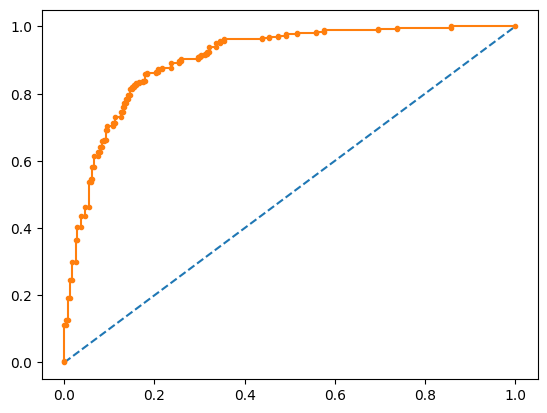

In [ ]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

Мы видим, что ROC-кривая находится выше референсной прямой и это свидетельствует о том, что модель работает лучше, чем случайное предсказание. Каждая точка - значение разное порога

Здесь мы значала рисуем прямую между точками (0,0) и (1, 1) - это референсная линия, которая представляет условный тривиальный классификатор. Именно с ней мы будем сравнивать получившуюся кривую  
Из графика мы видим, что кривая находится выше прямой, что свидетельствует о том, что классификатор работает лучше, чем случайное предсказание. Но можно заметить, что при разных значениях порога (зеленые точки на графике) модель имеет значительно различающиеся характеристики. И только одна точка на этом графике характеризует поведение модели при "дефолтном" значении порога - то, что мы обычно не задумываясь получаем методом predict.

Выведем метрику ROC-AUC, измеряющую площадь под графиком данной кривой

In [ ]:
print(roc_auc_score(y_test, y_pred_proba[:, 1]))

0.9027724358974359


Метрика довольно большая 0,9 - общее качество модели, вне зависисмости от выбранного порога

**PR-кривая**

PR-кривая помогает понять, как меняется точность и полнота модели при изменении порога. Тесно связана с Precision (точностью) и Recall (полнотой)

Для построения кривой PR используем встроенную в sklearn функцию precision_recall_curve, которая находится в пакете metrics. Эта функция возвращает 3 массива: precision, recall и значение порога

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

In [ ]:
precision, recall, treshold = precision_recall_curve(y_test, y_pred_proba[:, 1])

Обратите внимание, что в этих координатах (precision и recall) эффективность тривиального классификатора уже не так примитивна и ависит от соотношения классов в обучающей выборке

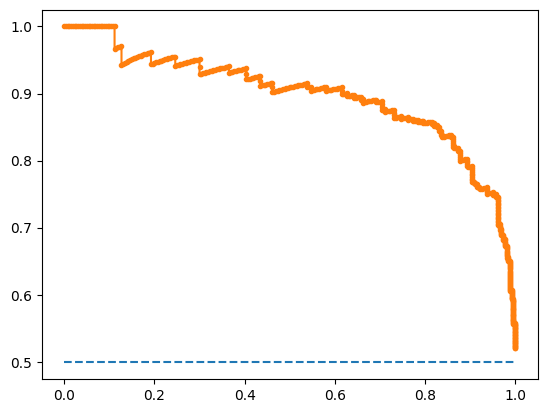

In [ ]:
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

plt.plot(recall, precision, marker='.')
plt.show()

Видим, что по горизонтали recall почти не меняется. А precision не должен опускаться меньше линии. Точно также, как и с ROC можно вычислить соответствующую численную метрику - площадь под графиком PR-кривой - PR-AUC

In [ ]:
AP = print(auc(recall, precision))

0.897662372903334


Эта метрика численно чуть ниже - порядка 89,8%. Еще это число называют средней точностью модели - average precision

Посмотрим, как соотносятся метрики ROC-AUC и AP с точными метриками по classification_report

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.83      0.82      0.83       240
           1       0.84      0.85      0.84       260

    accuracy                           0.83       500
   macro avg       0.83      0.83      0.83       500
weighted avg       0.83      0.83      0.83       500



Важно понимать, что данный отчет характеризует поведение модели только в одной точке - при значении порога, равном по умолчанию 0,5. Кривые же показывают, как модель будет работать при все возможных значениях порога.

Для сравнения обучим на этих же данных другую модель. Например, метод ближайших соседей

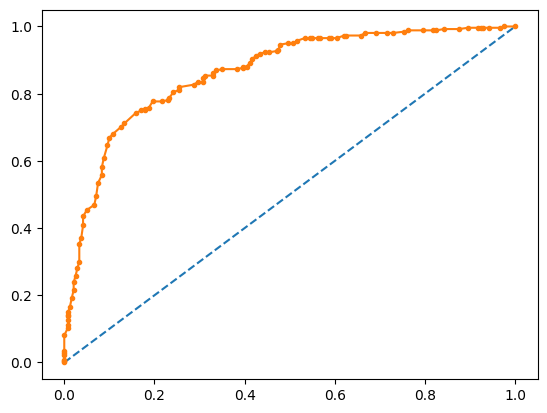

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

График будет выглядеть чуть по-другому, но в целом похоже на ROC первой модели. Поэтому для точного сравнения более полезны численные метрики

In [ ]:
print(roc_auc_score(y_test, y_pred2_proba[:, 1]))

0.8630608974358974


Тут явно видно, что ROC-AUC второй модели значимо хуже - 86,3%

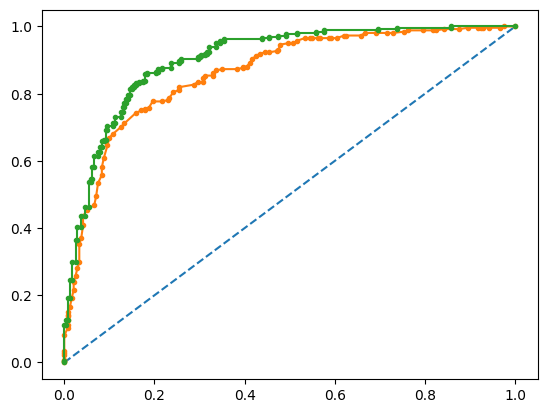

In [ ]:
model2 = KNeighborsClassifier(n_neighbors=250).fit(X_train, y_train)
y_pred2_proba = model2.predict_proba(X_test)
y_pred1_proba = model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred2_proba[:, 1])
fpr1, tpr1, _ = roc_curve(y_test, y_pred1_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.plot(fpr1, tpr1, marker='.')
plt.show()

По графику видно, что логистическая регрессия при разных значениях порога работает лучше, чем K-ближайших соседей

**Дизбаланс классов**

Наиболее явно различия между этими двумя классификационными кривыми - ROC и PR - демонстрирует пример с большим дизбалансом классов. Сгенерируем датасет, в котором объектов разных классов не примерно равное количество, как в предыдущем примере, а объектов отрицательного класса, скажем, 99%. Для этого очень удобно воспользоваться атрибутом weights функции make_classification

In [ ]:
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.99, 0.01], random_state=1)

Также разделим эту выборку на две части. Выведем объем классов в получившихся частях

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=4)

print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=490, Class1=10
Тестовая: Class0=495, Class1=5


Видно, что в одной половине выборки положительных объектов в два раза больше, чем в другой. Прислучайном разделении, если есть сильно миноритарные классы, может случиться и не такое. Например, мы можем случайно получить выборку, в которой какие-то классы не представлены вообще. Для предотвращения таких случаев нужно воспользоваться стратификацией

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

Этот агрумент следит за тем, чтобы в обоих частях выборки распределение переданного атрибута было примерно такое же, как и целом датасете

In [ ]:
print('Датасет: Class0=%d, Class1=%d' % (len(y[y==0]), len(y[y==1])))
print('Обучающая: Class0=%d, Class1=%d' % (len(y_train[y_train==0]), len(y_train[y_train==1])))
print('Тестовая: Class0=%d, Class1=%d' % (len(y_test[y_test==0]), len(y_test[y_test==1])))

Датасет: Class0=985, Class1=15
Обучающая: Class0=493, Class1=7
Тестовая: Class0=492, Class1=8


Распределение уже гораздо более равномерное. Для стратификации можно задавать любой массив, не обязательно значение целевой переменной, и разделение произойдет так, чтобы сохранить распределение, заданное в этом массиве. Но целевую переменную здесь используют чаще всего.

Обучим модель и вычислим матрицу вероятностей

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

Сразу познакомимся с дефолтным поведением модели, построив отчет о классификации

In [ ]:
y_test_pred = model.predict(X_test)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       492
           1       0.00      0.00      0.00         8

    accuracy                           0.98       500
   macro avg       0.49      0.50      0.50       500
weighted avg       0.97      0.98      0.98       500



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Здесь мы видим классическую картину обучения на неравномерной выборке. Мажоритарный класс (в данном случае - отрицательный, он у нас в большинстве) распознается очень хорошо, а миноритарный - очень плохо. В нашем случае, вообще по положительному классу все метрики нулевые. Но обратите внимание, что общая точность (accuracy) модели весьма приемлема - 98%. Дизбаланс классов "скрывает" в точности недостатки работы модели.

Построим ROC-кривую

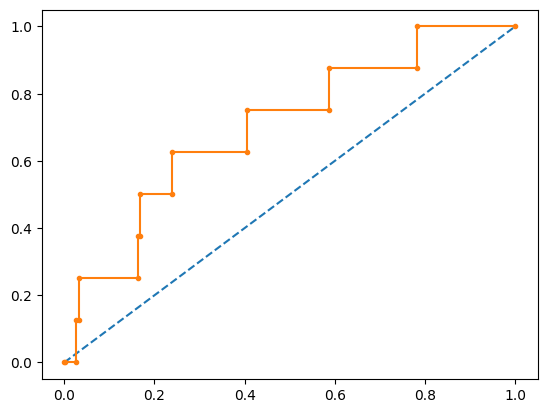

In [ ]:
fpr, tpr, _ = roc_curve(y_test, y_pred_proba[:, 1])

plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

Кривая показывает не идеальное, но вполне примелемое поведение модели. Средняя точность будет, несомненно, ниже, чем в первом примере работы, но ничего катастрофического мы здесь не наблюдаем

In [ ]:
print(roc_auc_score(y_test, y_pred_proba[:, 1]))

0.6994410569105691


Посроим PR-кривую

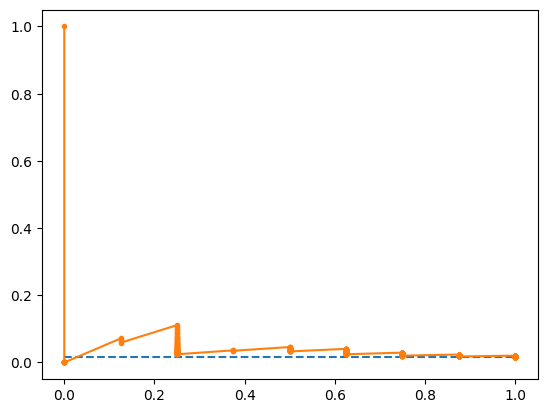

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
print(auc(recall, precision))

0.03701094772496362


И вот на этом графике уже открывается истинное поведение модели: она не очень-то отличается от тривиальной, просто чаще предсказывает самый распространенный класс. Так как метрики Precision и Recall специально были созданы для случая несбалансированных классов, именно PR-кривая дает более реалистические оценки эффективности работы моделей классификации на таких данных, где наблюдается большой дисбаланс классов.

**Выбор значения порога по кривым**

Кривые классификации, несомненно, удобный и визуальный способ представления эффективности работы моделей машинного обучения. Но главная их ценность состоит в том, что данные, которые необходимы для их построения могут использоваться для оптимизации порога классификации.    
Разные значения порога могут приводить к разному поведению моделей и, как следствие, к имзенению метрик. Значит, можно выбрать такой порог, который дает более точную классификацию?

Однако для этого нам понадобится некоторый критерий - численное значение, которые мы хотим оптимизировать. Для этого еще раз сгенерируем датасет, сделаем чуть больше объем данных

In [ ]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y)

model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

Изобразим PR-кривую

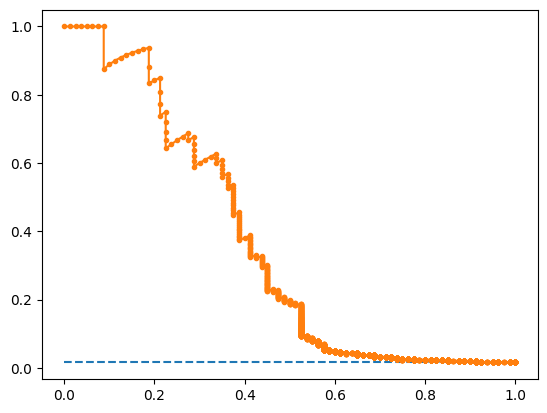

In [ ]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.show()

In [ ]:
print(auc(r, p))

0.36107042153971625


По точкам на ней мы видим, что при разных значениях порога иногда метрика precision будет больше, иногда - recall. Именно поэтому мы будем оптимизировать по метрике F1. Для этого импортируем из бибилиотеки numpy функцию argmax

In [ ]:
from numpy import argmax

Вычислим вектор метрик F1 при всех использованных значениях порога и найдем самое большое значение среди них

In [ ]:
f1 = (2 * p * r) / (p + r)
ix = argmax(f1)
pr_thresholds[ix]

np.float64(0.1889106660747742)

Так как индексы всех массивов, возвращенных функцией precision_recall_curve соответственны, по этому индексу получим значение порога и соответствующее ему значение метрики F1

In [ ]:
print('Порог=%f, F-Score=%.3f' % (pr_thresholds[ix], f1[ix]))

Порог=0.188911, F-Score=0.444


Теперь мы можем изобразить эту точку на графике самой кривой

In [ ]:
ix05 = np.argmin(np.abs(0.5 - pr_thresholds))
pr_thresholds[ix05]

np.float64(0.4930939697138205)

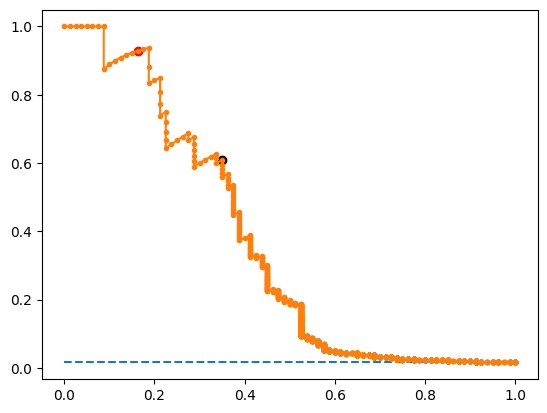

In [ ]:
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
plt.plot(r, p, marker='.')
plt.scatter(r[ix], p[ix], marker='o', color='black')
plt.scatter(r[ix05], p[ix05], marker='o', color='red')
plt.show()

В красной точке - дефолтное поведение модели. В черной - наилучшее поведение

Мы использовали метрику F1 - это среднее геометрическое между Precision и Recall. При этом эти две метрики имеют равный вклад в среднее. Бывают ситуации, когда нам более приоритетна одна из этих двух метрик. Тогда следует использоваться параметрическую метрику из F-семейства. Мы можем придать в среднем разный вес, то есть больше предпочесть recall или, наоборот, precision.

Давайте используем данное значение порога для проведение непосредственной классификации. Раньше мы так не делали, так как всегда использовали метод predict, который всегда использует порог по умолчанию - 0,5. Но точечная классификация - это не что иное, как выбор положительного класса, если модель оценивает вероятность принадлежности к нему выше порога

In [ ]:
y_pred = (y_pred_proba[:, 1] > pr_thresholds[ix]).astype('int')

Полученный вектор значений можно использовать при построении точета о классфикации

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.60      0.34      0.43        80

    accuracy                           0.99      5000
   macro avg       0.79      0.67      0.71      5000
weighted avg       0.98      0.99      0.98      5000



А вот для сравнения, отчет о классификации для той же модели, но при использованиии порога по умолчанию

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.92      0.15      0.26        80

    accuracy                           0.99      5000
   macro avg       0.95      0.57      0.63      5000
weighted avg       0.99      0.99      0.98      5000



**Задания для самостоятельного выполнения**

**1) Анализ с двумерными датасетами**

Возьмем существующий датасет "Breast Cancer Wisconsin" из sklearn.datasets:  
Целевая переменная: доброкачественная (0) или злокачественная опухоль (1)  
Из всего набора возьмем две признаки для визуализации (например, mean radius и mean texture)

In [ ]:
from sklearn.datasets import load_breast_cancer

Загрузим этот датасет и выделим целевую переменную

In [ ]:
data = load_breast_cancer()
X = data.data[:, [0, 1]]  # Используем только два признака для визуализации
y = data.target

Разделение на train, test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

Обучаем логистическую регрессию

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

Предсказываем вероятности

In [ ]:
y_proba = model.predict_proba(X_test)[:, 1]

Перебирем набор порогов от 0 до 1. При пороге 0 мы считаем все примеры положительными, при 1 — все отрицательными.

In [ ]:
thresholds = np.linspace(0.0, 1.0, 100)

Вычислим метрики при каждом пороге

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

In [ ]:
precisions = []
recalls = []
f1s = []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1s.append(f1_score(y_test, y_pred))

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Для каждого порога: превращаем вероятности в метки классов (если больше порога — 1, иначе — 0)  

- precision — насколько предсказания "1" точны  
- recall — насколько хорошо мы нашли все "1"  
- F1 — компромисс между ними  

Посторим ROC и PR-кривые  
ROC-кривая показывает, как меняются ошибки первого и второго рода при изменении порога  
PR-кривая показывает соотношение precision–recall, особенно полезна при несбалансированных классах  
AUC — площадь под ROC-кривой, хороший индикатор общей производительности модели.



ROC-кривая

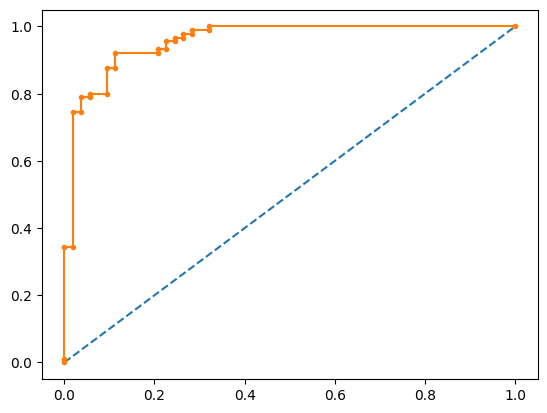

In [ ]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.')
plt.show()

In [ ]:
roc_auc = auc(fpr, tpr)
print(roc_auc)

0.958071278825996


PR-кривая

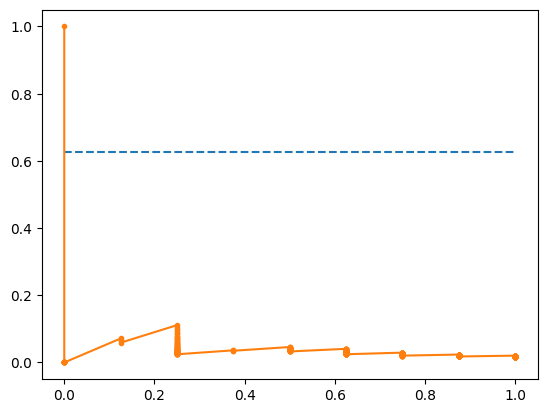

In [ ]:
prec_curve, rec_curve, pr_thresholds = precision_recall_curve(y_test, y_proba)
no_skill = len(y[y==1]) / len(y)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')

plt.plot(recall, precision, marker='.')
plt.show()

In [ ]:
AP = print(auc(recall, precision))

0.03701094772496362


Найдем оптимальный порог по F1

In [ ]:
best_f1_index = np.argmax(f1s)
best_f1_threshold = thresholds[best_f1_index]
print(best_f1_threshold)

0.5353535353535354


Изобразим графически, как изменение порога влияет на расположение границы принятия решений

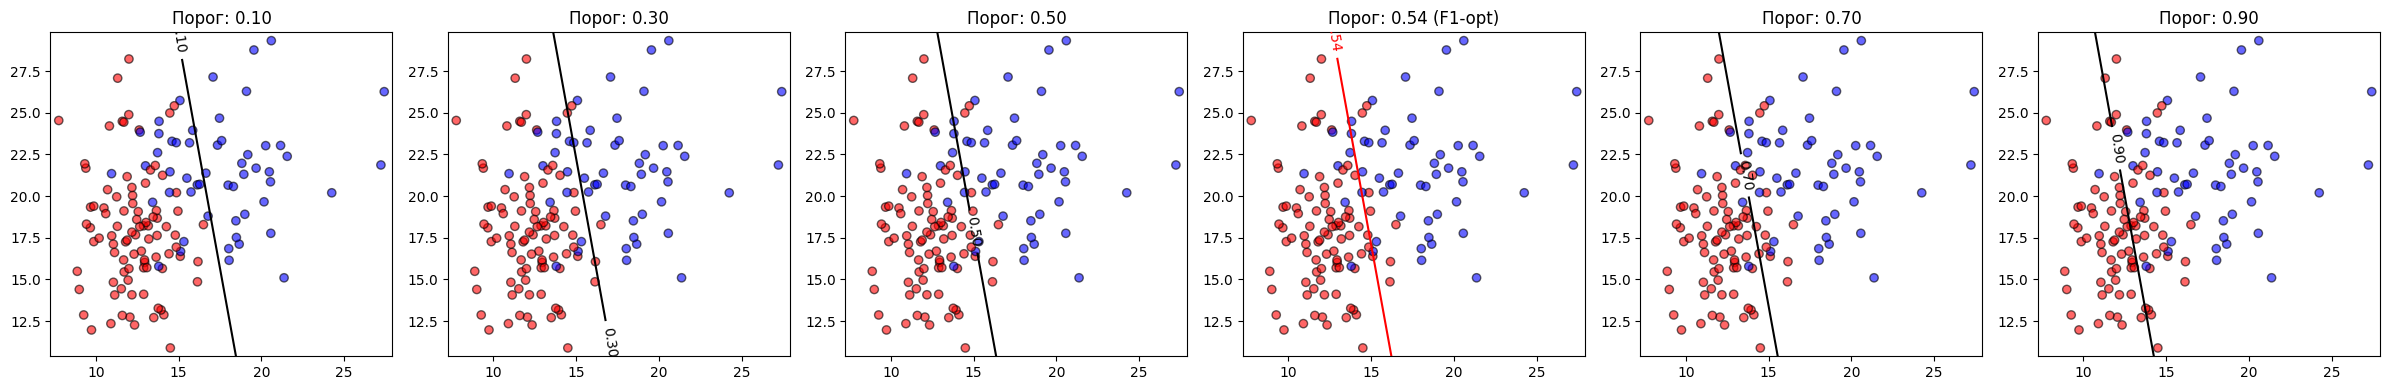

In [ ]:
all_thresholds = [0.1, 0.3, 0.5, 0.7, 0.9]
if not any(np.isclose(best_f1_threshold, t, atol=0.01) for t in all_thresholds):
    all_thresholds.append(best_f1_threshold)
all_thresholds = sorted(all_thresholds)
fig, axes = plt.subplots(1, len(all_thresholds), figsize=(4 * len(all_thresholds), 4))

for ax, t in zip(axes, all_thresholds):
    ax.set_title(f"Порог: {t:.2f}" + (" (F1-opt)" if np.isclose(t, best_f1_threshold, atol=1e-3) else ""))

    cs = ax.contour(xx, yy, Z, levels=[t], colors='red' if np.isclose(t, best_f1_threshold, atol=1e-3) else 'black')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='bwr', edgecolors='k', alpha=0.6)

    ax.clabel(cs, fmt={t: f'{t:.2f}'})
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

plt.tight_layout()
plt.show()

**Использование ROC при оптимизации порога и среднее геометрическое между TPR и FPR как критерий оптимизации**

Снова сгенерируем данные

In [ ]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[0.99, 0.01], random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, stratify=y, random_state=1)

Обучаем модель

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)[:, 1]

Оптимизация по PR-кривой

In [ ]:
p, r, pr_thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * p * r / (p + r + 1e-10)  # Добавляем маленькое число чтобы избежать деления на 0
ix_f1 = np.argmax(f1_scores)
opt_threshold_pr = pr_thresholds[ix_f1]

Оптимизация по ROC-кривой (sqrt(TPR*(1-FPR)))

In [ ]:
fpr, tpr, roc_thresholds = roc_curve(y_test, y_pred_proba)
geo_mean = np.sqrt(tpr * (1 - fpr))
ix_roc = np.argmax(geo_mean)
opt_threshold_roc = roc_thresholds[ix_roc]


Classification report for Default (0.5) threshold = 0.5000:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4920
           1       0.83      0.12      0.22        80

    accuracy                           0.99      5000
   macro avg       0.91      0.56      0.61      5000
weighted avg       0.98      0.99      0.98      5000


Classification report for Optimal PR (F1) threshold = 0.1205:

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4920
           1       0.42      0.41      0.42        80

    accuracy                           0.98      5000
   macro avg       0.71      0.70      0.70      5000
weighted avg       0.98      0.98      0.98      5000


Classification report for Optimal ROC (geo_mean) threshold = 0.0189:

              precision    recall  f1-score   support

           0       0.99      0.83      0.90      4920
           1       0.06      0.62      0

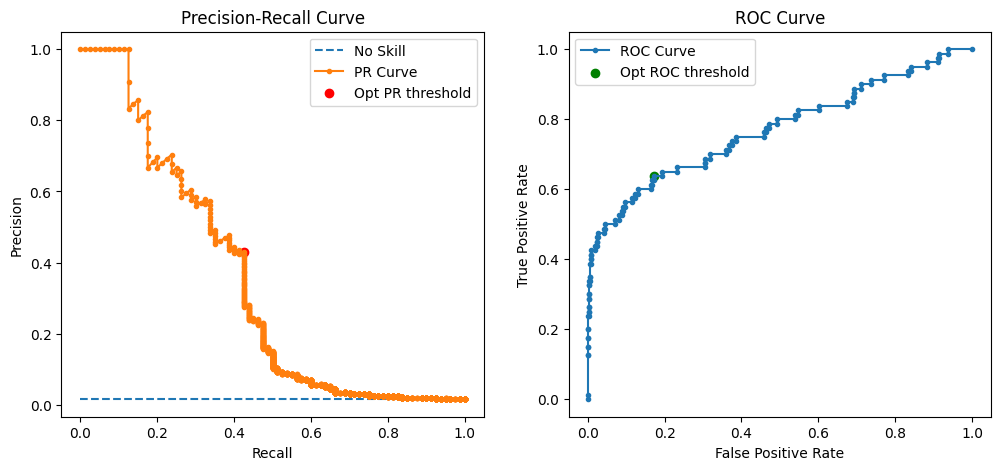

In [ ]:
# Пороги для сравнения
thresholds = {
    'Default (0.5)': 0.5,
    'Optimal PR (F1)': opt_threshold_pr,
    'Optimal ROC (geo_mean)': opt_threshold_roc
}

# Функция для вывода отчёта по каждому порогу
for name, thresh in thresholds.items():
    y_pred = (y_pred_proba > thresh).astype(int)
    print(f'\nClassification report for {name} threshold = {thresh:.4f}:\n')
    print(classification_report(y_test, y_pred))

# Визуализация кривых и выбранных точек (по желанию)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
no_skill = np.sum(y_test) / len(y_test)
plt.plot([0,1],[no_skill,no_skill],'--', label='No Skill')
plt.plot(r, p, marker='.', label='PR Curve')
plt.scatter(r[ix_f1], p[ix_f1], marker='o', color='red', label='Opt PR threshold')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.subplot(1,2,2)
plt.plot(fpr, tpr, marker='.', label='ROC Curve')
plt.scatter(fpr[ix_roc], tpr[ix_roc], marker='o', color='green', label='Opt ROC threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.show()

1. Порог по умолчанию (0.5)  
Precision (класс 1): 0.83, Recall: 0.12, F1: 0.22  

Модель почти не пропускает ложные срабатывания (редко ошибается, что положительный — это отрицательный), но пропускает большую часть положительных примеров.  

2. Оптимальный порог по PR-кривой (F1 = 0.42) — около 0.12
Precision и Recall примерно равны (0.42 и 0.41), баланс между ними улучшился.  

F1 значительно лучше, чем при пороге 0.5.  

Это значит, что порог подобран так, чтобы модель уравновесила пропуск положительных и ложные срабатывания.  

3. Оптимальный порог по ROC (геометрическое среднее TPR и 1-FPR) — около 0.019
Recall 0.62 — самый высокий среди трёх, то есть модель больше находит положительные примеры.  

Но Precision очень низкий — 0.06, много ложных срабатываний.  

Общая точность (accuracy) упала до 0.82, так как много FP.  

Итоговый вывод:  
Порог по умолчанию (0.5) слишком жесткий — пропускает почти 90% положительных.  

Порог, оптимизированный по F1 (PR-кривая) — лучший компромисс, сбалансированная точность и полнота, подходит для большинства задач.  

Порог по ROC с геометрическим средним — максимальная полнота, но с ценой большого числа ложных тревог, подойдет если важно не пропустить ни одного положительного.

**Задача множественной классификации**

In [ ]:
from sklearn.preprocessing import label_binarize
from yellowbrick.classifier import ROCAUC

Сгенерируем многоклассовый датасет (3 класса)

In [ ]:
X, y = make_classification(
    n_samples=5000,
    n_classes=3,
    n_informative=5,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

Создадим модель

In [ ]:
model = LogisticRegression(max_iter=1000, multi_class='ovr')

С помощью ROCAUC из yellowbrick строим ROC-кривые для каждого класса. Параметры micro и macro позволяют построить агрегированные ROC-кривые (микро- и макро-усредненные). Визуализация покажет ROC-кривые для каждого класса

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


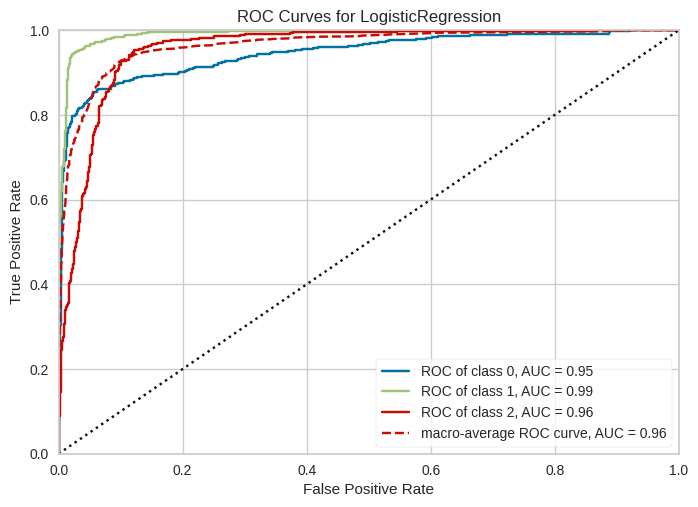

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
# Визуализатор ROC AUC для многоклассовой задачи
visualizer = ROCAUC(model, classes=[0, 1, 2], micro=False, macro=True)

# Обучаем модель и рисуем ROC-кривые
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

Выведем метрики

In [ ]:
y_pred = model.predict(X_test)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.83      0.87       501
           1       0.93      0.96      0.94       498
           2       0.83      0.87      0.85       501

    accuracy                           0.89      1500
   macro avg       0.89      0.89      0.89      1500
weighted avg       0.89      0.89      0.89      1500

Accuracy: 0.8860


Модель показала хорошее качество классификации на тестовой выборке с общей точностью (accuracy) около 89%. По классам наблюдается следующий результат:  
- Класс 0: precision 0.91, recall 0.83, f1-score 0.87 — модель хорошо распознает объекты этого класса, но пропускает часть из них (recall ниже precision)

- Класс 1: precision 0.93, recall 0.96, f1-score 0.94 — лучший результат по полноте и точности, этот класс распознается очень уверенно

- Класс 2: precision 0.83, recall 0.87, f1-score 0.85 — немного ниже метрики по сравнению с классами 0 и 1, но всё равно на хорошем уровне

Макро- и взвешенные средние метрики совпадают и также показывают высокую сбалансированность модели по всем классам. В целом, модель демонстрирует сбалансированное качество, немного лучше справляясь с классом 1, но при этом неплохо классифицируя и другие классы.



# Кросс-валидация
**Цель работы**  
Познакомиться с основными типами разбиений данных при осуществлении кросс-валидации с использованием библиотеки sklearn.

**Содержание работы**  
Загрузите датасет ирисы Фишера из библиотеки sklearn.datasets.  
Сделайте hold-out разбиение данных. Для этого разделите данные на обучающую и валидационную выборки и выведите на экран соответствующие индексы разбиения.  
Теперь сделайте разбиение перемешанных данных, зафиксировав воспроизводимость выбора данных после перемешивания, указав значение параметра random_state=42 и выведите на экран соответствующие индексы разбиения.  
Обучите модель логистической регрессии на обучающих данных. Выведите значения коэффициентов модели, полученных в результате обучения. Сделайте предсказание на тестовом наборе признаков. Выведите значение метрик accuracy и f1-score.  
Разделите данные на обучающую и валидационную выборки по новому в соотношении 75-25. Обучите модель на этих данных, выведите значения получившихся коэффициентов модели. Выведите значения метрик и сравните их со значениями из предыдущего пункта. Сделайте вывод о том, влияет ли способ разбиения на результат.  
Теперь сделайте k-блочную перекрёстную проверку модели (кросс-валидацию). Сравните полученные метрики с метриками, которые были при hold-out разбиении.  
Теперь сделайте ту же самую перекрёстную проверку модели, используя библиотечную функцию cross_val_score. Убедитесь, что получится тот же результат.  
Теперь сделайте k-блочную перекрёстную проверку модели (кросс-валидацию) со стратификацией. Проделайте всё тоже самое, что и в предыдущем пункте.  
Теперь сделайте перекрёстную проверку, изпользуя leave-one-out разбиение. Проделайте всё тоже самое, что и в предыдущем пункте.

Будем использовать датасет "Ирисы Фишера". Загружаем данные

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
X=iris.data
y=iris.target

In [ ]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Данные хранятся в обычных массивах. Кроме самих данных в датасете присутствует дополнительная информация и описание данных.

Преобразуем данные для наглядности в DataFrame

In [ ]:
iris_data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
name_map = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2:'Iris-virginica'}
iris_data['class'] = [name_map[k] for k in iris['target']]
iris_data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


Данный датасет содержит  
3 класса: Setosa, Versicolor, Virginica  
4 числовых признака: длина и ширина чашелистика и лепестка

Разобьем исходную выборку на две части: тренировочную и тестовую

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=5)

В данном случае мы резервируем 15% данных для тестовой выборки.

Обучим модель логистической регрессии и выведем значения метрик

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8260869565217391
0.8000000000000002


Видим, что модель обучилась до уровня точности 82,6%. Насколько это хорошо, судить сложно, надо сравнивать с результативностью других моделей. Для более наглядного представления результата можно вывести отчет о классификации

<Axes: >

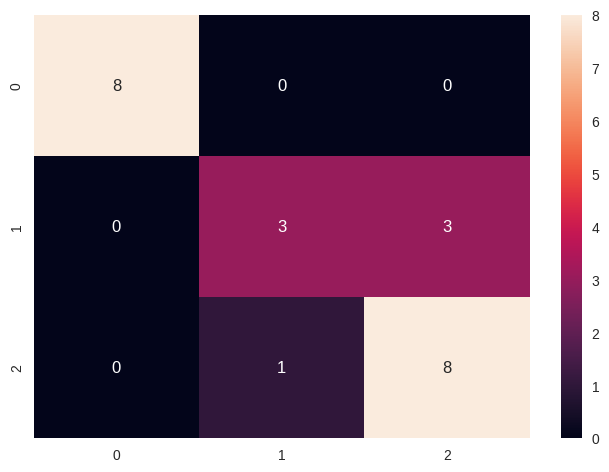

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Видим, что на главной диагонали довольно большие значения. Модель плохо определяет принадлежность ко второму классу и частично первому

Но заметим, что эта оценка производилась именно при данном разбиении. Что будет, если мы сделаем другое разбиение датасета на две части? Давайте повторим разбиение с другим значением random_state, обучим другую модель и выведем те же метрики

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=3)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

1.0
1.0


Теперь получается, что модель обучилась идеально. Это же подтверждает и матрица

<Axes: >

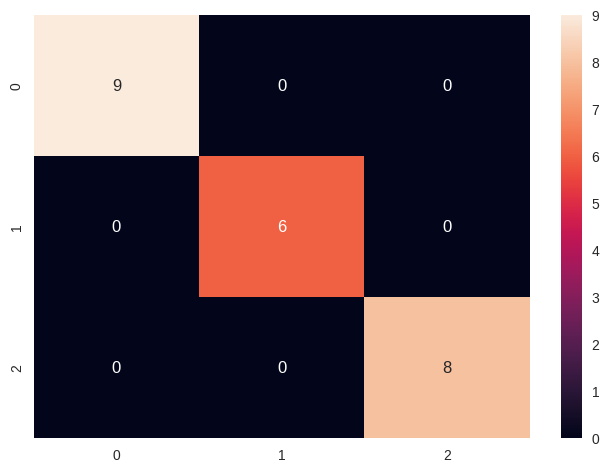

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Можно повторять эту процедуру несколько раз и каждый раз будут получаться разные значения метрик. Например при таком разбиении модель обучается гораздо хуже

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=8)
model = LogisticRegression()
model.fit(X_train, y_train) #Обучение трейновой выборке
y_pred = model.predict(X_test) #Предсказание для тестовой выборки
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

0.8695652173913043
0.8745098039215686


<Axes: >

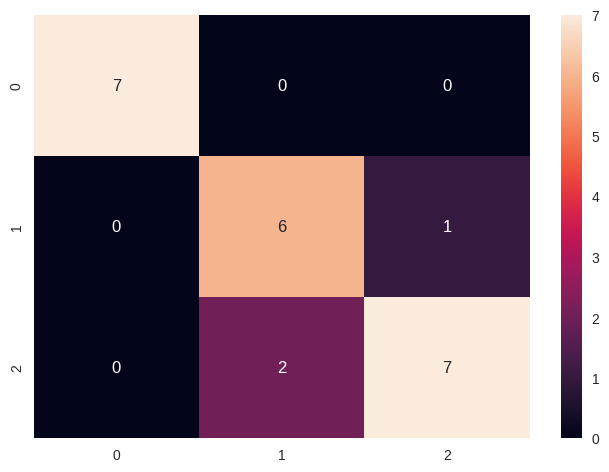

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

Для устранения этих случайных колебаний и нужна перекрестная проверка или кросс-валидация

**Перекрестная проверка**

Оценим работу построенной модели с помощью перекрёстной проверки

In [ ]:
from sklearn.model_selection import KFold,StratifiedKFold,LeaveOneOut, cross_val_score

**k-fold разбиение**

В k-блочной перекрёстной проверке исходные данные разбиваются на
k
 (примерно) равных по количеству частей, называемых "блоками", на 𝑘−1 из которых производится обучение, а на 1 валидация. В результате получается более робастная оценка эффективности выбранной модели.  

Создаём k-блочное разбиение (KFold)

In [ ]:
kf = KFold(n_splits = 3,shuffle=True, random_state=15)
kf

KFold(n_splits=3, random_state=15, shuffle=True)

Метод split() - возвращает индексы разбиения. В данном случаем мы разделили на 3 равные части "блоки"

Сделаем разбиение на блоки

In [ ]:
for i, (train_index, test_index) in enumerate(kf.split(y)):
    print("Fold {}: Длинна train: {}, Длинна test: {}".format(i+1, len(train_index), len(test_index)))
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1: Длинна train: 100, Длинна test: 50
Train: index=[  1   2   3   4   7  10  14  15  16  17  18  19  22  23  24  26  28  29
  32  33  34  35  37  38  39  40  41  42  43  44  45  46  49  50  51  52
  53  54  56  60  62  63  64  65  66  68  69  70  73  75  76  77  79  80
  81  82  83  85  87  88  91  92  93  94  96  99 101 102 104 105 106 107
 108 110 111 113 114 117 118 119 120 121 123 125 128 131 132 133 134 135
 136 137 139 140 141 142 144 145 146 147]
 Test:  index=[  0   5   6   8   9  11  12  13  20  21  25  27  30  31  36  47  48  55
  57  58  59  61  67  71  72  74  78  84  86  89  90  95  97  98 100 103
 109 112 115 116 122 124 126 127 129 130 138 143 148 149]
Fold 2: Длинна train: 100, Длинна test: 50
Train: index=[  0   1   4   5   6   7   8   9  10  11  12  13  15  17  19  20  21  22
  23  24  25  26  27  28  30  31  34  36  37  39  40  41  42  44  47  48
  50  53  55  56  57  58  59  60  61  62  63  65  66  67  70  71  72  74
  75  78  79  84  85  86  89  90  95  96  97

Сделаем кросс-валидацию  
Модель обучается `k` раз — каждый раз берётся один из фолдов как **тестовая выборка**, а оставшиеся `k-1` используются для **обучения**.  
    
После `k` итераций метрики (например, accuracy, precision, recall и др.) усредняются — и это даёт более надёжную оценку, чем один запуск на фиксированном трейне/тесте

In [ ]:
metrics_accuracy = []
metrics_f1 = []
model = LogisticRegression(solver='liblinear')
for i, (train_index, test_index) in enumerate(kf.split(y)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics_accuracy.append(accuracy_score(y_test, y_pred))
    metrics_f1.append(f1_score(y_test, y_pred, average='macro'))

Выведем соответствующие массивы с метриками

In [ ]:
print('Значения метрики accuracy: {} \nЗначения метрики f1: {}'.format(metrics_accuracy, metrics_f1))

Значения метрики accuracy: [0.96, 0.96, 0.9] 
Значения метрики f1: [0.9595588235294118, 0.9629629629629629, 0.890652557319224]


Выведем среднее значение метрики

In [ ]:
import numpy as np
print("Среднее по кросс-валидации: ", np.array(metrics_f1).mean())

Среднее по кросс-валидации:  0.9377247812705329


Это и будет наша кросс-валидированная оценка метрики. Она гораздо ближе к истинному уровню эффективности модели за счет того, что все случайные ошибки выборки усредняются. Можно еще вывести дисперсию данной оценки, которая показывает степень уверенности в ней:

In [ ]:
print("Среднее по кросс-валидации: ", np.array(metrics_f1).mean())

Среднее по кросс-валидации:  0.9377247812705329


Выполняем кросс-валидацию с помощью функции cross_val_score

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = kf,                # тип разбиения (можно указать просто число фолдов cv = 3)
                             scoring = 'accuracy',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())
print("Дисперсия по кросс-валидации: ", cv_results.std())

Кросс-валидация:  [0.96 0.96 0.9 ]
Среднее по кросс-валидации:  0.94
Дисперсия по кросс-валидации:  0.028284271247461874


Валидация по К-блокам (фолдам) - это самый распространенный алгоритм разбиения датасета на блоки. Он является золотым стандартом в научных исследованиях.

**Stratified k-Fold**

Метод stratified k-Fold — это метод k-Fold, использующий стратификацию при разбиении на фолды: каждый фолд содержит примерно такое же соотношение классов, как и всё исходное множество. Такой подход может потребоваться в случае, например, очень несбалансированного соотношения классов.

Создаём стратифицированное k-блочное разбиение (StratifiedKFold):

In [ ]:
skf = StratifiedKFold(n_splits=3,shuffle=True, random_state=15)
skf.get_n_splits(X, y)

3

Выведем разбиение на блоки

In [ ]:
for i, (train_index, test_index) in enumerate(skf.split(X,y)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  0   1   2   3   4   5   7   8   9  12  14  15  16  17  18  19  21  23
  24  25  26  28  29  31  32  36  37  38  39  40  41  44  45  51  52  53
  54  55  60  61  62  63  65  66  68  70  72  75  77  80  81  82  83  84
  85  86  87  89  90  91  93  94  95  96  97  98 101 102 103 104 105 107
 110 111 112 113 114 116 118 121 122 123 124 126 127 128 129 132 133 134
 139 140 141 142 143 144 145 146 147 149]
 Test:  index=[  6  10  11  13  20  22  27  30  33  34  35  42  43  46  47  48  49  50
  56  57  58  59  64  67  69  71  73  74  76  78  79  88  92  99 100 106
 108 109 115 117 119 120 125 130 131 135 136 137 138 148]
Fold 2:
Train: index=[  0   1   2   4   5   6   9  10  11  13  14  15  16  19  20  21  22  23
  26  27  28  29  30  31  33  34  35  42  43  46  47  48  49  50  51  54
  55  56  57  58  59  61  63  64  66  67  69  70  71  73  74  75  76  78
  79  83  84  87  88  89  90  91  92  94  96  97  99 100 101 103 105 106
 107 108 109 110 114 115 116 117 118 119 

Выполняем кросс-валидацию с помощью функции cross_val_score

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = skf,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1.         1.         0.92046784]
Среднее по кросс-валидации:  0.9734892787524366


**Leave-one-out**

Метод leave-one-out (LOO) является частным случаем метода k-Fold: в нём каждый фолд состоит ровно из одного семпла.  

Создаём разбиение

In [ ]:
loo = LeaveOneOut()

Сделаем разбиение на блоки

In [ ]:
for i, (train_index, test_index) in enumerate(loo.split(X)):
    print(f"Fold {i+1}:")
    print('Train: index={}\n Test:  index={}'.format(train_index, test_index))

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

Fold 1:
Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149]
 Test:  index=[0]
Fold 2:
Train: index=[  0   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  

In [ ]:
cv_results = cross_val_score(model,                  # модель
                             X,                      # матрица признаков
                             y,                      # вектор цели
                             cv = loo,           # тип разбиения
                             scoring = 'f1_macro',   # метрика
                             n_jobs=-1)              # используются все ядра CPU

print("Кросс-валидация: ", cv_results)
print("Среднее по кросс-валидации: ", cv_results.mean())

Кросс-валидация:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
Среднее по кросс-валидации:  0.9533333333333334


# Недообучение и переобучение
**Цель работы**  
Познакомиться с основными проблемами обобщающей способности алгоритмов машинного обучения: overfitting (переобучение) и underfitting (недообучение).  

**Содержание работы**  
Загрузите первые 400 строк прилагающегося датасета diabetes.csv.
Сделайте количественное описание датасета: число признаков, статистику по признакам.  
Отделите целевую переменную Outcome.  
Разделите данные на обучающую и валидационную выборки при помощи train_test_split из библиотеки sklearn.model_selection в соотношении 80-20 (для этого укажите параметр test_size=0.2) с перемешиванием, указав значение параметра random_state=42.  
Создайте объект DecisionTreeClassifier(random_state=1). Обучите модель на обучающих (трейновых) данных. Сделайте предсказание на трейновом и валидационном наборе признаков. Выведите значения метрики f1-scoreдля трейнового и валидационного наборов данных. По полученным значениям метрик сделайте предположение о переобученности модели.  
Произведите кросс-валидацию с использованием функции cross_validate из библиотеки sklearn.model_selection. По полученным данным, постройте график зависимости значений f1-score от набора данных соответствующей итерации. По графику убедитесь в том, что имеет место переобученность модели.  
Для борьбы с переобучением регуляризуйте модель DecisionTreeClassifier, уменьшив глубину дерева, указав параметр регуляризации max_depth=3.  
Снова проделайте пункт 6 с учётом регуляризации и убелитесь по графику в том, что модель больше не является переобученной.  
Теперь рассмотрите проблему недообучения модели. Для борьбы с недообучением модели добавьте данные. Для этого загрузите все строки датасета diabetes.csv.  
Обучите модель DecisionTreeClassifier(random_state=1, max_depth=3) на всех данных и убедитесь в том, что значение метрики f1-score улучшилось.  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Диагностика моделей классификации

Для первого примера воспользуемся синтетическими данными. Сгенерируем большой и достаточно сложный датасет для классификации. В нем будет 10 тысяч точек и 500 атрибутов. Из них всего 50 признаков будут информативными. Сразу после генерации разделим получившийся датасет на обучающую и тестовую выборки

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=500,
                           n_informative=50, n_repeated=0,
                           class_sep=1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=3)

Обучим на этом наборе данных самую простую модель - логистическую регрессию. Выведем оценки точности этой модели на обучающей и тестовой выборке

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8413
Test score: 0.8056


В данном случае мы используем метрику эффективности классификации по умолчанию

То, насколько отличается обучающая и тестовая эффективность модели - основной индикатор пере- или недообучения. Мы явно видим, что тестовая эффективность полученной модели неидеальна. Определить, что является причиной снижения качества модели - ее излишняя или недостаточная вариативность - основная цель диагностики модели машинного обучения.  

Но по одним этим показателям очень сложно понять, в какой из двух ситуаций мы находимся. Поэтому прибегнем к построению кривых обучения. Это даст нам больше информации о том, каков уровень сложности модели по отношению к данным. Воспользуемся готовой реализацией построения кривых обучения из библиотеки продвинутой визуализации для машинного обучения yellowbrick

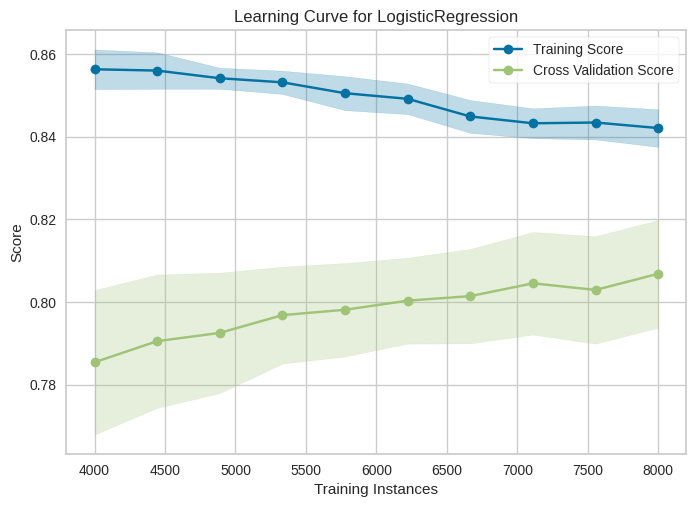

In [ ]:
from yellowbrick.model_selection import LearningCurve

visualizer = LearningCurve(
    LogisticRegression(), train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y).show()

Здесь мы задаем модель, которую хотим проверить и набор долей обучающей выборки, по которым будем ее обучать. В данном случае, эта функция построит модели логистической регрессии, обученные на 10%, 20%, и так далее до 100% обучающей выборки. А затем по каждой модели будет вычислена обучающая и тестовая эффективности. И эти показатели будут изображены на графике, то есть кривой обучения

Эта кривая показывает, что когда модель учится на небольшом объеме данных, она имеет прекрасную обучающую эффективность, но плохую тестовую. По мере увеличения объема обучающей выборки, эти эффективности сближаются, но между ними все еще сохраняется зазор.  

Напомним, что большой промежуток между тестовой и обучающей эффективностью свидетельствует о переобучении. А низкое значение обучающей эффективности - о недообучении. Так что из этого присутствует в данной модели? Можно предположить, что модель немного переобучается. В пользу этого говорит и то, что наш исходный датасет очень разреженный (хотя мы об этом знаем только потому, что его сгенерировали). Более точно можно будет сказать сравнив эту модель с другими. Самый простой способ - использовать регуляризацию.  

МЫ воспользуемся классификатором на основе гребневой регрессии. Вспомним, что обычный метод наименьших квадратов (воплощением которого является модель логистической регрессии) эквивалентна гребневой модели с параметром регуляризации, равном нулю. Чем больше этот параметр, тем больше регуляризации в модели и тем проще получаемые модели. Если мы предполагаем, что наша исходная модель переобучалась, то давайте построим и оценим модель с большим значением параметра регуляризации:

In [ ]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=1000000).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7724
Test score: 0.7712


эффективность стала заметно ниже. Плюс, значения почти совпадают. То есть, почти никакой разницы не осталось. Это подтверждает наш первоначальный вывод о том, что в первой модели разница между обучающей и тестовой эффективностью получилась довольно большой для данной задачи. Построим кривые обучения для нашей второй модели

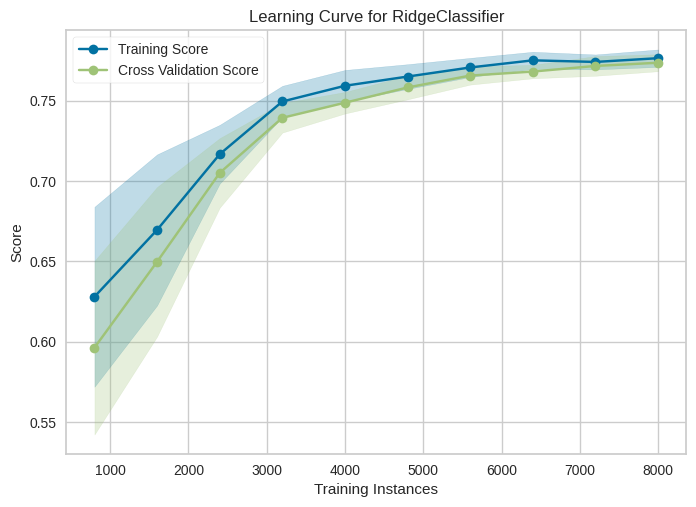

In [ ]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=1000000), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

При анализе таких графиков надо обязательно обращать внимание на масштаб вертикальной оси. Несмотря на то, что кажется, будто значения в правой части графика (а нам интересны в первую очередь именно конечные значения эффективности, остальные - это просто предыстория) сильно больше, чем на первом, на самом деле они ниже. Данный график очень характерен для недообучения - низкие значения эффективности и практически никакой разницы между тестовой и обучающей эффективностью.  

Если нерегуляризованная модель переобучается, а регуляризованная - недообучается, то где-то в промежутке есть оптимальная модель, котор  

Для того, чтобы проанализировать данную задачу еще более глубоко построим график зависимости эффективности модели от значения параметра регуляризации. Для этого воспользуется логравномерным распределением:

Данный код построит 50 моделей, различающихся только параметром регуляризации. Он будет лежать в диапазоне от 100 (
10
2
) до 100 000 (
10
6
). Диапазон подбирается эмпирически, интересующий нас интервал значений параметров регуляризации будет разный в других задачах. Поэтому рекомендуется сначала построить модели в очень широких пределах (скажем, от -6 до 6), а затем сужать его

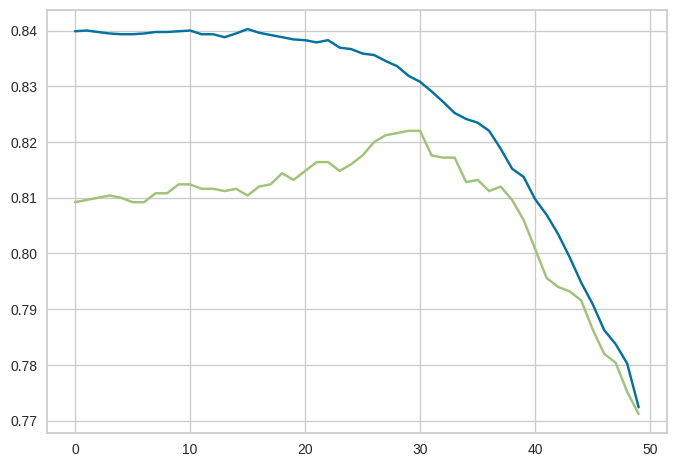

In [ ]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(2, 6, 50):
  ridge = RidgeClassifier(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains)
plt.plot(tests)

Здесь мы видим, что при определенных значениях параметра регуляризации тестовая эффективность модели (а нас в конечном итоге интересует именно она) лучше, чем во всех остальных. Подбором или алгоритмически можно найти такое оптимальное значение параметра регуляризации. Оно дает нам модель, которая имеет оптимальный уровень сложности для данного конкретного датасета. Давайте выведем получившиеся показатели:

In [ ]:
from sklearn.linear_model import RidgeClassifier
lr = RidgeClassifier(alpha=26500).fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.8311
Test score: 0.8228


Это произошло потому, что мы за счет регуляризации убрали негативный эффект переобучения. Давайте построим кривые обучения, чтобы посмотреть, как они выглядят для "хорошей" модели

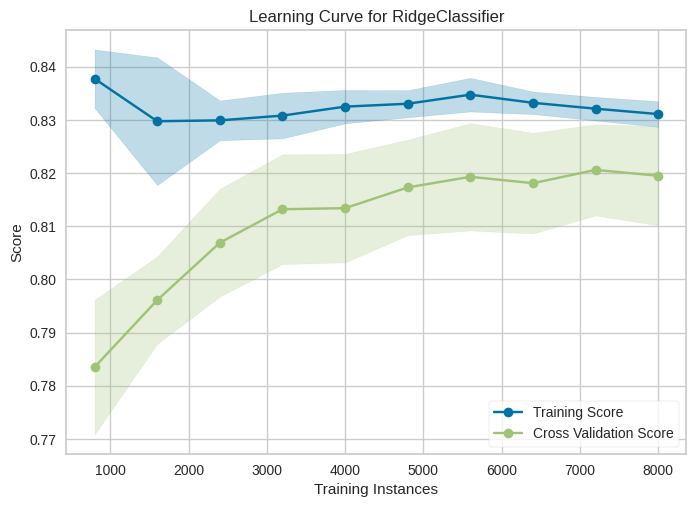

In [ ]:
visualizer = LearningCurve(
    RidgeClassifier(alpha=26500), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

Диагностика моделей регрессии

Для более реалистичного примера загрузим датасет цен на недвижимость

In [ ]:
from numpy import genfromtxt
dataset = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/refs/heads/master/BostonHousing.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0)

In [ ]:
# Выводим первые 5 строк
print("Первые 5 строк датасета:")
print(dataset[:5])

Первые 5 строк датасета:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


датасет "Boston Housing" содержит информацию о различных районах Бостона и предназначен для предсказания средней стоимости жилья (в тысячах долларов) в этих районах на основе нескольких характеристик.

Это набор данных для решения задачи регрессии - предсказания цен объектов недвижимости по их характеристикам. Самостоятельно изучите данный датасет, приведите его численные показатели. А мы сразу выведем оценку эффективности простой модели - линейной регрессии:

In [ ]:
from sklearn.linear_model import LinearRegression
lr = Ridge().fit(X_train, y_train)

print(f"Training score: {lr.score(X_train, y_train):.4f}")
print(f"Test score: {lr.score(X_test, y_test):.4f}")

Training score: 0.7679
Test score: 0.6266


Большой разрыв между обучающей и тестовой эффективностью также сразу должен навести на мысль о переобучении данной модели. Попробуем проверить наше предположение при помощи кривых обучения (обратите внимание, что мы сразу используем гребневую модель с очень маленькой регуляризацией):

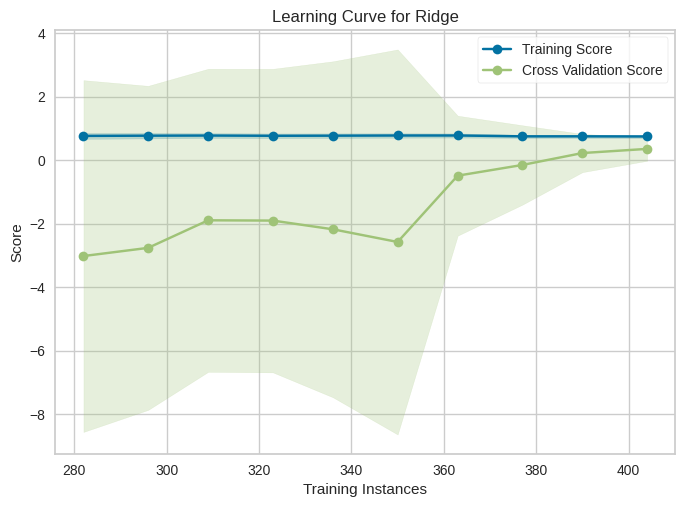

In [ ]:
from yellowbrick.model_selection import LearningCurve
from sklearn.linear_model import Ridge
visualizer = LearningCurve(
    Ridge(alpha=0.0001), scoring='r2', train_sizes=np.linspace(0.7, 1.0, 10)
).fit(X, y) .show()

Обратите внимание, что промежуток между обучающей и тестовой эффективностью все равно очень большой в правой части графика, хоть чисто визуально и не выглядит таковым. Просто тестовая эффективность в левой части графика просто ужасна, и она сильно смещает вертикальную ось вниз. Тем не менее, можно обоснованно предположить, что такая модель переобучается на имеющихся данных.

Сразу построим график зависимости эффективности модели от значения параметра L2-регуляризации

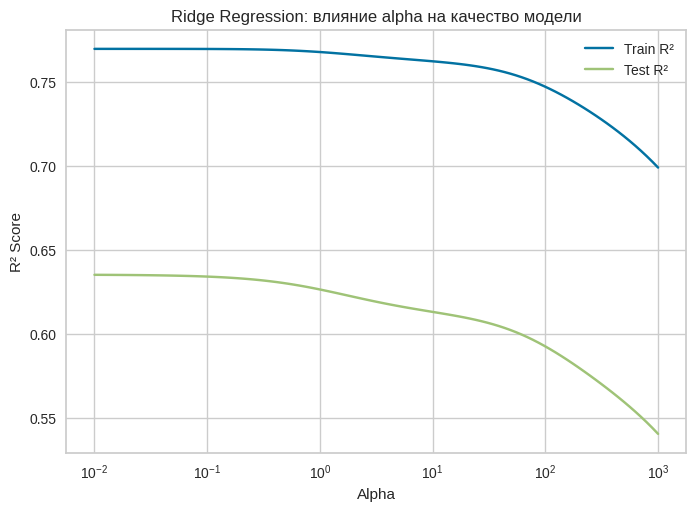

In [ ]:
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

trains = []
tests = []
alphas = np.logspace(-2, 3, 100)

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)  # обучаем Ridge с текущим alpha
    trains.append(ridge.score(X_train, y_train))  # R² на тренировке
    tests.append(ridge.score(X_test, y_test))    # R² на тесте

# Визуализация
plt.plot(alphas, trains, label="Train R²")
plt.plot(alphas, tests, label="Test R²")
plt.xscale("log")  # логарифмическая шкала для alpha
plt.xlabel("Alpha")
plt.ylabel("R² Score")
plt.legend()
plt.title("Ridge Regression: влияние alpha на качество модели")
plt.grid(True)
plt.show()

На этом графике очень наглядно виден характер кривых регуляризации. В левой области лежат значения, которые дают слишком сложные модели. Они хорошо описывают обучающую выборку, но не обобщаются на тестовую. Это зона переобучения. В правой области - значения, порождающие слишком простые модели. Они одинаково плохо описывают и обучающую и тестовые выборки. Это зона недообучения. Посередине между ними лежит оптимальный уровень сложности модели для данного конкретного датасета. Здесь эта оптимальность очень хорошо выражена.

In [ ]:
lr = Ridge(alpha=0.18).fit(X_train, y_train)

print(f"Linear Regression-Training set score: {lr.score(X_train, y_train):.2f}")
print(f"Linear Regression-Test set score: {lr.score(X_test, y_test):.2f}")

Linear Regression-Training set score: 0.77
Linear Regression-Test set score: 0.63


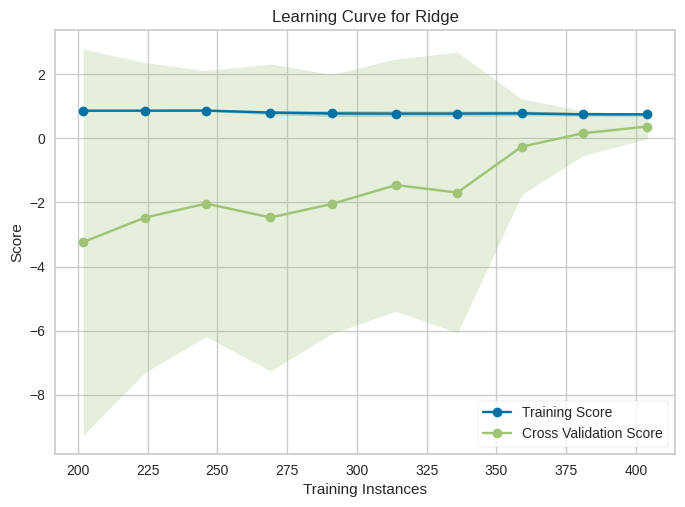

In [ ]:
visualizer = LearningCurve(
    Ridge(alpha=0.18), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show()

Здесь можно заметить, что несмотря на то, что мы подобрали наилучший уровень сложности модели, ее эффективность все равно не идеальна. Присутствует и разница между тестовой и обучающей эффективностью. Это свидетельствует о том, что и в нашей самой лучшей модели все равно имеется и bias и variance в какой-то степени. И хоть мы нашли лучшую модель, она лучшая из одного отдельного класса моделей - гребневой регрессии.

Поэтому можно исследовать на этом же датасете и другие модели. Так, например, можно попробовать другой вид регуляризации - лассо. В библиотеке sklearn эта модель работает только как регрессор, то есть она не подходит для задач классификации. Поэтому мы не могли использовать ее в предыдущем примере. Сразу построим кривые регуляризации:

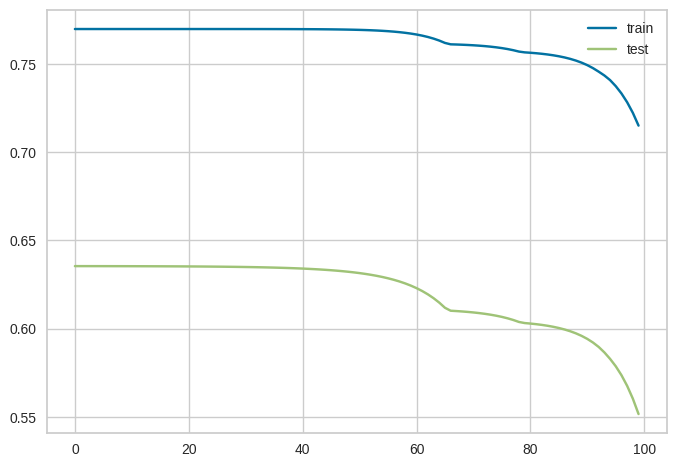

In [ ]:
from sklearn.linear_model import Lasso
trains = []
tests = []
for i in np.logspace(-4, 0, 100):
  ridge = Lasso(alpha=i).fit(X_train, y_train)
  trains.append(ridge.score(X_train, y_train))
  tests.append(ridge.score(X_test, y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

Точно также можно исследовать и другие виды моделей. Итого для диагностики моделей используется три инструмента:

сравнение обучающей и тестовой эффективности
анализ формы кривых обучения
построение кривых по одному из гиперпараметров модели, который влияет на соотношение bias/variance
Но главное - это сравнение между собой нескольких моделей одного типа, но с разным уровнем сложности (еще говорят про модели с разной склонностью к пере- или недообучению).

Диагностика на реальных данных

рассмотрим приемы диагностики моделей на реальных данных. Будем использовать известный датасет для классификации "Диабет"

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv',nrows=200)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Обратите внимание, что мы считали только первые 200 строк из файла. Этим мы имитируем обучение на части данных. Формируем обучающую и тестовую выборки:

In [ ]:
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Для моделирования выберем совершенно другой тип модели - решающие деревья. Создадим объект модели дерева решений и исследуем его эффективность:

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.5500


Даже без построения кривых обучения здесь очевидно переобучение модели. Но все же для тренировки распознавания разных ситуаций на графике построим кривую обучения:

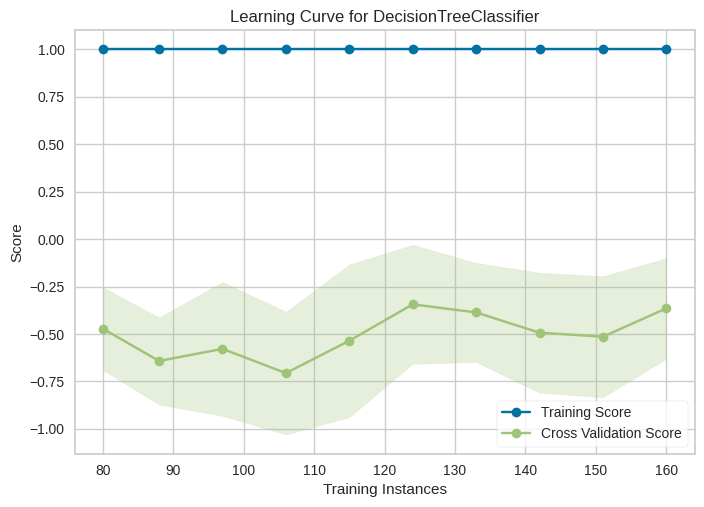

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(random_state=1), scoring='r2', train_sizes=np.linspace(0.5, 1.0, 10)
).fit(X, y) .show()

У деревьев решений один из параметров - максимальная глубина дерева как раз и влияет на склонность модели к переобучению. Аналогом регуляризации для деревьев будет искусственное ограничение максимальной глубины дерева. Давайте построим кривую обучения для такого регуляризованного дерева:

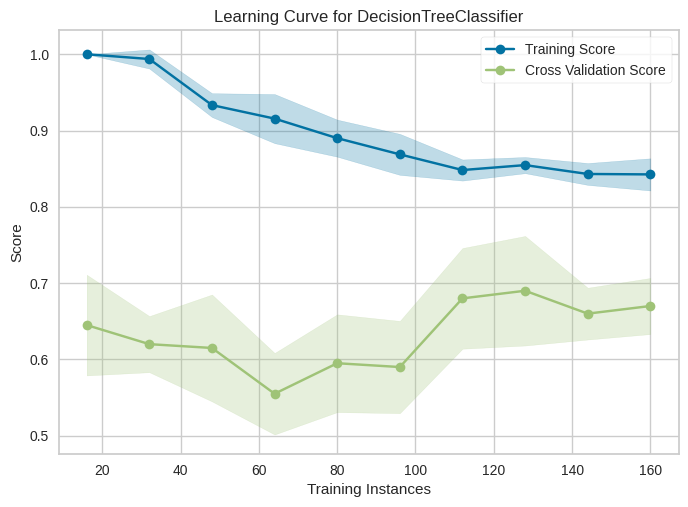

In [ ]:
visualizer = LearningCurve(
    DecisionTreeClassifier(max_depth=4), train_sizes=np.linspace(0.1, 1.0, 10)
).fit(X, y) .show()

Выведя метрики эффективности получаем более высокое качество модели на тестовых данных

Введение регуляризации, искусственное упрощение моделей - не единственный способ борьбы с переобучением. Самый лучший способ - это обучение на более полном датасете, то есть добавление большого количества данных. В этом примере мы специально не использовали весь имеющийся набор данных. На части модель сильно переобучается, но чем больше данных, тем меньше модели (даже одинаковые по сложности) становятся склонными к переобучению.  

Для иллюстрации этого повторим обучение нерегуляризованного дерева решений на всем датасете:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML4.3%20diagnostics/diabetes.csv')
target = "Outcome"
y = df[target]
X = df.drop(target, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=1).fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
from sklearn.metrics import f1_score
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 1.0000
Test score = 0.7273


Получившаяся модель значительно лучше, чем даже регуляризованное дерево. В общем случае, добавление данных работает лучше, чем регуляризация.

Диагностика недообучения

До сих пор мы рассматривали примеры, в которых модели по умолчанию демонстрируют явное переобучение. Но на практике чаще сталкиваются с недообучением, так как начинают анализ с более простых моделей, которые как раз склонны именно к недообучению. Рассмотрим в качестве примера более сложный датасет.

В sklearn есть встроенный механизм загрузки датасетов из онлайн репозитория OpenML. Возьмем оттуда датасет, посвященный проблеме управления истребителем F16:

In [ ]:
from sklearn.datasets import fetch_openml
data = fetch_openml(name='delta_ailerons', parser="auto")
data.data.shape

(7129, 5)

Сформируем обучающую и тестовую выборки:

In [ ]:
X = pd.get_dummies(data.data)
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Создадим и оценим простую модель логистической регрессии:

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.6092
Test score = 0.5989


Построим кривую обучения данной модели:

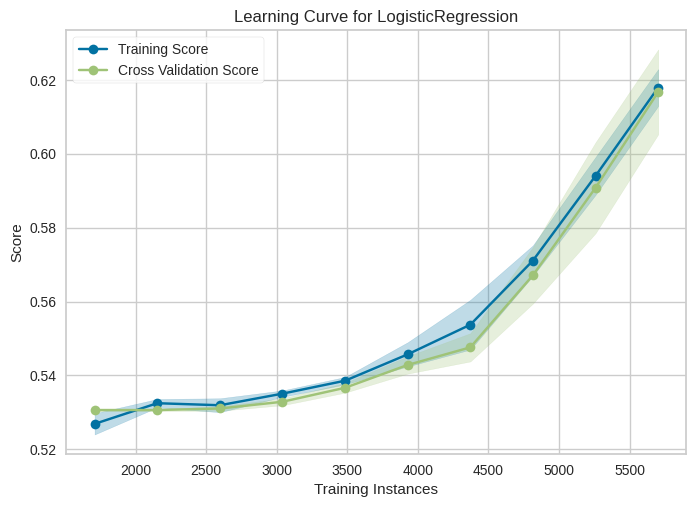

In [ ]:
visualizer = LearningCurve(
    LogisticRegression(), scoring='accuracy', train_sizes=np.linspace(0.3, 1.0, 10)
).fit(X, y) .show()

Здесь очевидны признаки недообучения: низкий уровень обучающей эффективности, малый разрыв между обучающей и тестовой эффективностью. При недообучении регуляризация не поможет, даже навредит, так как еще усилит его. Поэтому единственный путь в этом случае - использовать более сложные, вариативные модели. Можно, например, попробовать многослойный перцептрон:

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9388
Test score = 0.9404


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Самого главного мы добились - эффективность модели сильно выросла. Но давайте построим график обучения:

Кроме использования более вариативных моделей самих по себе можно ввести в модель полиномиальные признаки:

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.preprocessing import PolynomialFeatures
model = RidgeClassifier(alpha=0.001).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
y_train_pred = model.predict(PolynomialFeatures(2).fit_transform(X_train))
y_pred = model.predict(PolynomialFeatures(2).fit_transform(X_test))
print("Train score = %.4f" % accuracy_score(y_train, y_train_pred))
print("Test score = %.4f" % accuracy_score(y_test, y_pred))

Train score = 0.9392
Test score = 0.9362


Для этой полиномиальной модели уже можно пробовать использовать регуляризацию и строить соответствующие кривые:

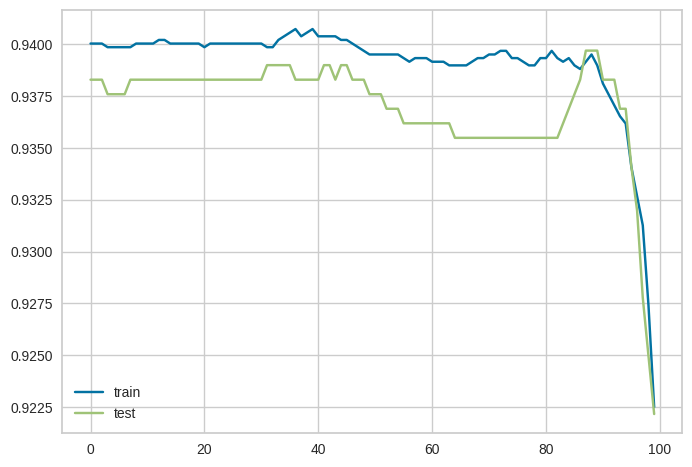

In [ ]:
from sklearn.linear_model import RidgeClassifier
trains = []
tests = []
for i in np.logspace(-7, 0, 100):
  ridge = RidgeClassifier(alpha=i).fit(PolynomialFeatures(2).fit_transform(X_train), y_train)
  trains.append(ridge.score(PolynomialFeatures(2).fit_transform(X_train), y_train))
  tests.append(ridge.score(PolynomialFeatures(2).fit_transform(X_test), y_test))

plt.plot(trains, label="train")
plt.plot(tests, label="test")
plt.legend()

Также можно заметить, что этот график уже не такой гладкий и ровный, как в предыдущих примерах. На нем присутствуют скачки, неравномерности. Это все случайные отклонения, которые обусловлены и артефактами в самих данных, и стохастичностью процесса обучения сложных моделей и случайными ошибками выборки, возникшими при разделении датасета на тестовую и обучающую выборки.

**Задания для сам. выполнения**

 Оценим модель классификации синтетических данных с использованием precision, recall и F1-score

In [ ]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Генерация синтетических данных
X, y = make_classification(n_samples=1000, n_features=20, n_informative=2,
                           n_redundant=10, random_state=42)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Предсказания и точность
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.84


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

Precision: 0.812
Recall: 0.848
F1 Score: 0.830
